In [1]:
import pandas as pd
import numpy as np
import os
import json
import glob
from matplotlib import pyplot as plt
from monty.serialization import loadfn

In [2]:
data_dir = "./DeltaQFastCharge/"
file_list = glob.glob(os.path.join(data_dir, '*.json'))
file_list[:5]

['./DeltaQFastCharge\\LFP_15C_0-100_0.5-1C_a_CH00_features_DeltaQFastCharge.json',
 './DeltaQFastCharge\\LFP_15C_0-100_0.5-1C_a_CH01_features_DeltaQFastCharge.json',
 './DeltaQFastCharge\\LFP_15C_0-100_0.5-1C_a_CH02_features_DeltaQFastCharge.json',
 './DeltaQFastCharge\\LFP_15C_0-100_0.5-1C_a_CH03_features_DeltaQFastCharge.json',
 './DeltaQFastCharge\\LFP_15C_0-100_0.5-1C_a_CH04_features_DeltaQFastCharge.json']

In [3]:
# data_dir = "./DeltaQFastCharge/"
# file_list = glob.glob(os.path.join(data_dir, '*.json'))

delta_df = pd.DataFrame()
for f in file_list:
    with open(f) as fp:
        data = json.load(fp)
        for k in data['X'].keys():
            data['X'][k] = data['X'][k][0]
        delta_df = delta_df.append(pd.Series(data['X']), ignore_index=True)
delta_df.head()

,abs_first_discharge_capacity_difference_cycles_2:100,abs_kurtosis_discharge_capacity_difference_cycles_2:100,abs_mean_discharge_capacity_difference_cycles_2:100,abs_min_discharge_capacity_difference_cycles_2:100,abs_skew_discharge_capacity_difference_cycles_2:100,abs_variance_discharge_capacity_difference_cycles_2:100,charge_time_cycles_1:5,discharge_capacity_cycle_100,discharge_capacity_cycle_2,integrated_time_temperature_cycles_1:100,...,intercept_discharge_capacity_cycle_number_91:100,internal_resistance_cycle_2,internal_resistance_difference_cycles_2:100,max_discharge_capacity_difference,max_temperature_cycles_1:100,min_internal_resistance_cycles_2:100,min_temperature_cycles_1:100,nominal_capacity_by_median,slope_discharge_capacity_cycle_number_2:100,slope_discharge_capacity_cycle_number_91:100
0,-3.309824,1.867028,-2.742859,-0.446806,0.584775,-3.166992,5760.000000,1.032,1.030,306697.588291,...,1.032000,NaN,NaN,1.035,18.459000,NaN,15.160000,1.033,-0.000595,1.217792e-17
1,-3.019408,2.349816,-2.648706,-0.208776,0.993881,-3.056759,5785.600098,1.042,1.040,296427.402899,...,1.042000,NaN,NaN,1.043,16.705999,NaN,15.281000,1.044,-0.000603,-5.691578e-18
2,-2.312774,1.694375,-1.917594,-0.195631,0.655882,-2.478396,5811.200195,1.030,1.030,262556.750559,...,1.030000,NaN,NaN,1.029,20.877001,NaN,15.107000,1.031,-0.000596,1.727324e-17
3,-2.677882,1.495850,-2.076420,-0.631730,0.057256,-2.981589,5785.600098,1.025,1.029,268508.727464,...,1.025000,NaN,NaN,1.026,22.084999,NaN,15.306000,1.028,-0.000626,1.943125e-18
4,-2.005443,0.393445,-1.682799,-0.189399,-0.220132,-1.291194,5785.600098,1.059,1.067,614925.496456,...,1.068364,NaN,NaN,1.074,25.669001,NaN,24.084999,1.067,-0.000724,-9.696970e-05


In [4]:
delta_df.isna().sum(axis=0)

abs_first_discharge_capacity_difference_cycles_2:100        9
abs_kurtosis_discharge_capacity_difference_cycles_2:100     9
abs_mean_discharge_capacity_difference_cycles_2:100         0
abs_min_discharge_capacity_difference_cycles_2:100          0
abs_skew_discharge_capacity_difference_cycles_2:100         9
abs_variance_discharge_capacity_difference_cycles_2:100     0
charge_time_cycles_1:5                                      0
discharge_capacity_cycle_100                                0
discharge_capacity_cycle_2                                  0
integrated_time_temperature_cycles_1:100                    0
intercept_discharge_capacity_cycle_number_2:100             0
intercept_discharge_capacity_cycle_number_91:100            0
internal_resistance_cycle_2                                30
internal_resistance_difference_cycles_2:100                30
max_discharge_capacity_difference                           0
max_temperature_cycles_1:100                                2
min_inte

In [5]:
delta_df = delta_df.drop(columns=['internal_resistance_cycle_2', 'internal_resistance_difference_cycles_2:100', 'min_internal_resistance_cycles_2:100'], axis=0)
delta_df.shape

(30, 18)

In [6]:
delta_df.isna().sum(axis=0)

abs_first_discharge_capacity_difference_cycles_2:100       9
abs_kurtosis_discharge_capacity_difference_cycles_2:100    9
abs_mean_discharge_capacity_difference_cycles_2:100        0
abs_min_discharge_capacity_difference_cycles_2:100         0
abs_skew_discharge_capacity_difference_cycles_2:100        9
abs_variance_discharge_capacity_difference_cycles_2:100    0
charge_time_cycles_1:5                                     0
discharge_capacity_cycle_100                               0
discharge_capacity_cycle_2                                 0
integrated_time_temperature_cycles_1:100                   0
intercept_discharge_capacity_cycle_number_2:100            0
intercept_discharge_capacity_cycle_number_91:100           0
max_discharge_capacity_difference                          0
max_temperature_cycles_1:100                               2
min_temperature_cycles_1:100                               2
nominal_capacity_by_median                                 0
slope_discharge_capacity

In [7]:
data_dir2 = "./TrajectoryFastCharge/"
file_list = glob.glob(os.path.join(data_dir2, '*.json'))

traj_df = pd.DataFrame()
for f in file_list:
    with open(f) as fp:
        data = json.load(fp)
        traj_df = traj_df.append(pd.Series(data['X']).apply(lambda x: x[0]), ignore_index=True)

In [8]:
traj_df.head()

,capacity_0.8,capacity_0.83,capacity_0.86,capacity_0.89,capacity_0.92,capacity_0.95,capacity_0.98
0,4550.0,4550.0,4550.0,4550.0,506.0,506.0,506.0
1,3552.0,3552.0,3552.0,3552.0,3552.0,506.0,506.0
2,3760.0,3760.0,3760.0,3760.0,506.0,506.0,506.0
3,3753.0,3753.0,3753.0,3753.0,506.0,506.0,506.0
4,3049.0,3049.0,3049.0,3049.0,207.0,207.0,207.0


In [9]:
full_df = pd.merge(delta_df,traj_df, left_index=True, right_index=True)
full_df.head()

,abs_first_discharge_capacity_difference_cycles_2:100,abs_kurtosis_discharge_capacity_difference_cycles_2:100,abs_mean_discharge_capacity_difference_cycles_2:100,abs_min_discharge_capacity_difference_cycles_2:100,abs_skew_discharge_capacity_difference_cycles_2:100,abs_variance_discharge_capacity_difference_cycles_2:100,charge_time_cycles_1:5,discharge_capacity_cycle_100,discharge_capacity_cycle_2,integrated_time_temperature_cycles_1:100,...,nominal_capacity_by_median,slope_discharge_capacity_cycle_number_2:100,slope_discharge_capacity_cycle_number_91:100,capacity_0.8,capacity_0.83,capacity_0.86,capacity_0.89,capacity_0.92,capacity_0.95,capacity_0.98
0,-3.309824,1.867028,-2.742859,-0.446806,0.584775,-3.166992,5760.000000,1.032,1.030,306697.588291,...,1.033,-0.000595,1.217792e-17,4550.0,4550.0,4550.0,4550.0,506.0,506.0,506.0
1,-3.019408,2.349816,-2.648706,-0.208776,0.993881,-3.056759,5785.600098,1.042,1.040,296427.402899,...,1.044,-0.000603,-5.691578e-18,3552.0,3552.0,3552.0,3552.0,3552.0,506.0,506.0
2,-2.312774,1.694375,-1.917594,-0.195631,0.655882,-2.478396,5811.200195,1.030,1.030,262556.750559,...,1.031,-0.000596,1.727324e-17,3760.0,3760.0,3760.0,3760.0,506.0,506.0,506.0
3,-2.677882,1.495850,-2.076420,-0.631730,0.057256,-2.981589,5785.600098,1.025,1.029,268508.727464,...,1.028,-0.000626,1.943125e-18,3753.0,3753.0,3753.0,3753.0,506.0,506.0,506.0
4,-2.005443,0.393445,-1.682799,-0.189399,-0.220132,-1.291194,5785.600098,1.059,1.067,614925.496456,...,1.067,-0.000724,-9.696970e-05,3049.0,3049.0,3049.0,3049.0,207.0,207.0,207.0


In [10]:
variance_model_features = 'X.abs_variance_discharge_capacity_difference_cycles_2:100'
discharge_model_features = ['X.abs_min_discharge_capacity_difference_cycles_2:100',
                            'X.abs_variance_discharge_capacity_difference_cycles_2:100',
                            'X.abs_skew_discharge_capacity_difference_cycles_2:100',
                            'X.abs_kurtosis_discharge_capacity_difference_cycles_2:100',
                            'X.discharge_capacity_cycle_2',
                            'X.max_discharge_capacity_difference'
                            ]
full_model_features = ['X.abs_min_discharge_capacity_difference_cycles_2:100',
                       'X.abs_variance_discharge_capacity_difference_cycles_2:100',
                       'X.slope_discharge_capacity_cycle_number_2:100',
                       'X.intercept_discharge_capacity_cycle_number_2:100',
                       'X.discharge_capacity_cycle_2',
                       'X.charge_time_cycles_1:5',
                       'X.integrated_time_temperature_cycles_1:100',
                       'X.min_internal_resistance_cycles_2:100',
                       'X.internal_resistance_difference_cycles_2:100']
y = 'X.capacity_0.8'

Text(0, 0.5, 'capacity')

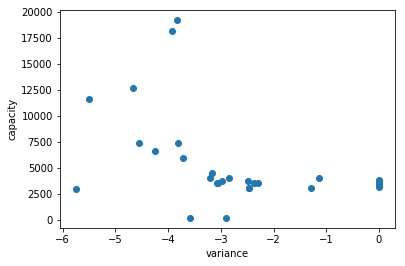

In [11]:
plt.scatter(full_df["abs_variance_discharge_capacity_difference_cycles_2:100"], full_df["capacity_0.8"])
plt.xlabel('variance')
plt.ylabel('capacity')

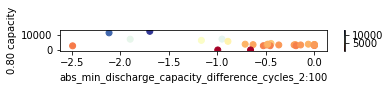

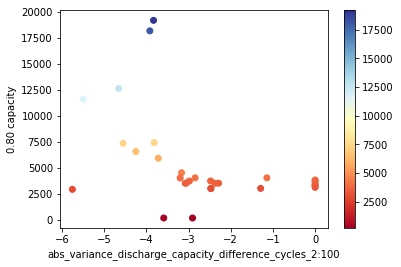

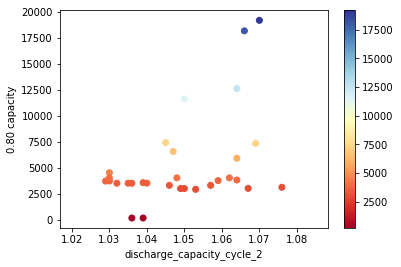

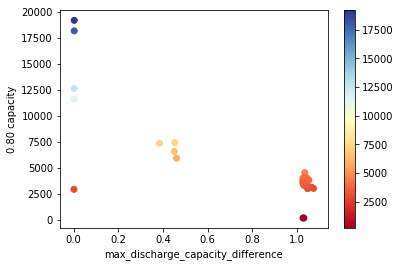

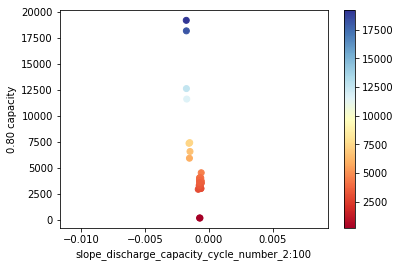

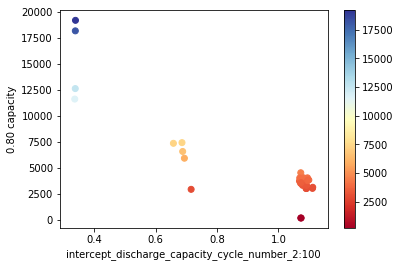

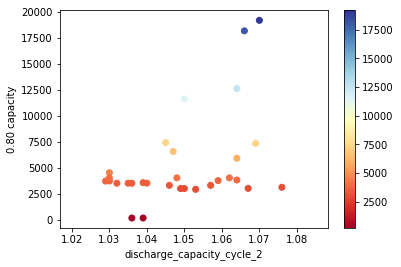

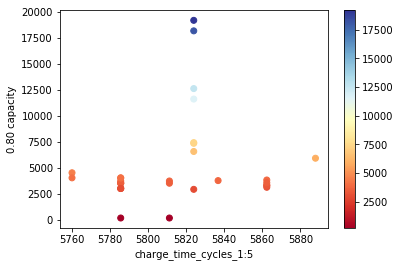

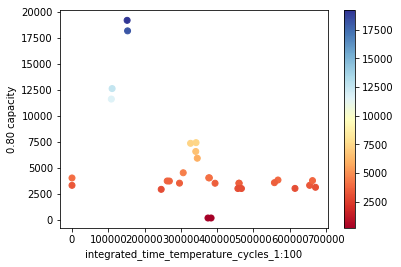

In [18]:
xvars = ['abs_min_discharge_capacity_difference_cycles_2:100',
         'abs_variance_discharge_capacity_difference_cycles_2:100',
         'discharge_capacity_cycle_2',
         'max_discharge_capacity_difference',
         'slope_discharge_capacity_cycle_number_2:100', 
         'intercept_discharge_capacity_cycle_number_2:100',
         'discharge_capacity_cycle_2',
         'charge_time_cycles_1:5',
         'integrated_time_temperature_cycles_1:100']
        
fig=plt.figure()
for i in range(len(xvars)):
    fig.add_subplot(len(xvars), 1, i + 1)
    plt.xlabel(xvars[i])
    plt.ylabel('0.80 capacity')
    plt.scatter(full_df[xvars[i]], full_df["capacity_0.8"], c=full_df["capacity_0.8"], cmap="RdYlBu")
    plt.colorbar()
    plt.show()

Plot below is very similar to the one in the paper.

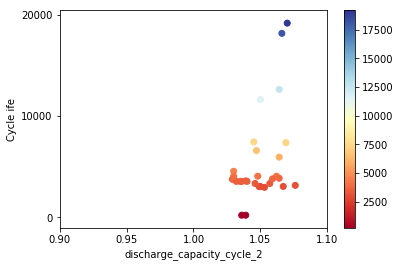

In [19]:
plt.xlabel('discharge_capacity_cycle_2')
plt.ylabel('Cycle ife')
plt.xlim([0.9, 1.1])
plt.yticks(np.arange(0, 20001, 10000))
plt.scatter(full_df['discharge_capacity_cycle_2'], full_df["capacity_0.8"], c=full_df["capacity_0.8"], cmap="RdYlBu")
plt.colorbar()

Look at the covariance matrix

In [46]:
import seaborn as sns
corr = full_df.iloc[: ,:18].corr()
full_df.iloc[: ,:18].corr()[full_df.iloc[: ,:18].corr().abs() >= .5]

,abs_first_discharge_capacity_difference_cycles_2:100,abs_kurtosis_discharge_capacity_difference_cycles_2:100,abs_mean_discharge_capacity_difference_cycles_2:100,abs_min_discharge_capacity_difference_cycles_2:100,abs_skew_discharge_capacity_difference_cycles_2:100,abs_variance_discharge_capacity_difference_cycles_2:100,charge_time_cycles_1:5,discharge_capacity_cycle_100,discharge_capacity_cycle_2,integrated_time_temperature_cycles_1:100,intercept_discharge_capacity_cycle_number_2:100,intercept_discharge_capacity_cycle_number_91:100,max_discharge_capacity_difference,max_temperature_cycles_1:100,min_temperature_cycles_1:100,nominal_capacity_by_median,slope_discharge_capacity_cycle_number_2:100,slope_discharge_capacity_cycle_number_91:100
abs_first_discharge_capacity_difference_cycles_2:100,1.000000,-0.857846,0.806162,NaN,-0.573099,0.795595,0.828018,NaN,0.574807,NaN,NaN,NaN,NaN,0.815320,0.879548,NaN,-0.677286,NaN
abs_kurtosis_discharge_capacity_difference_cycles_2:100,-0.857846,1.000000,-0.885222,-0.572634,0.815180,-0.896389,-0.735469,NaN,-0.741110,NaN,-0.620281,NaN,-0.514772,-0.819216,-0.859432,-0.553653,0.798750,NaN
abs_mean_discharge_capacity_difference_cycles_2:100,0.806162,-0.885222,1.000000,0.698460,-0.526459,0.909149,0.567258,NaN,NaN,NaN,NaN,NaN,NaN,0.666889,0.704615,NaN,NaN,NaN
abs_min_discharge_capacity_difference_cycles_2:100,NaN,-0.572634,0.698460,1.000000,NaN,0.884176,NaN,0.820163,NaN,0.504514,0.831899,0.822071,0.898777,NaN,NaN,0.823042,0.681470,NaN
abs_skew_discharge_capacity_difference_cycles_2:100,-0.573099,0.815180,-0.526459,NaN,1.000000,-0.566956,NaN,NaN,-0.685438,NaN,-0.589591,NaN,NaN,-0.539233,-0.505910,-0.537571,0.658778,NaN
abs_variance_discharge_capacity_difference_cycles_2:100,0.795595,-0.896389,0.909149,0.884176,-0.566956,1.000000,NaN,0.672832,NaN,0.607292,0.682783,0.677121,0.722830,0.590146,0.578910,0.676527,0.568224,-0.534902
charge_time_cycles_1:5,0.828018,-0.735469,0.567258,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.517941,0.632446,NaN,NaN,NaN
discharge_capacity_cycle_100,NaN,NaN,NaN,0.820163,NaN,0.672832,NaN,1.000000,NaN,0.519324,0.999503,0.999836,0.969387,NaN,NaN,0.999931,0.964563,NaN
discharge_capacity_cycle_2,0.574807,-0.741110,NaN,NaN,-0.685438,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.520199,NaN
integrated_time_temperature_cycles_1:100,NaN,NaN,NaN,0.504514,NaN,0.607292,NaN,0.519324,NaN,1.000000,0.528616,0.521968,0.514611,0.604000,0.650971,0.523061,NaN,NaN


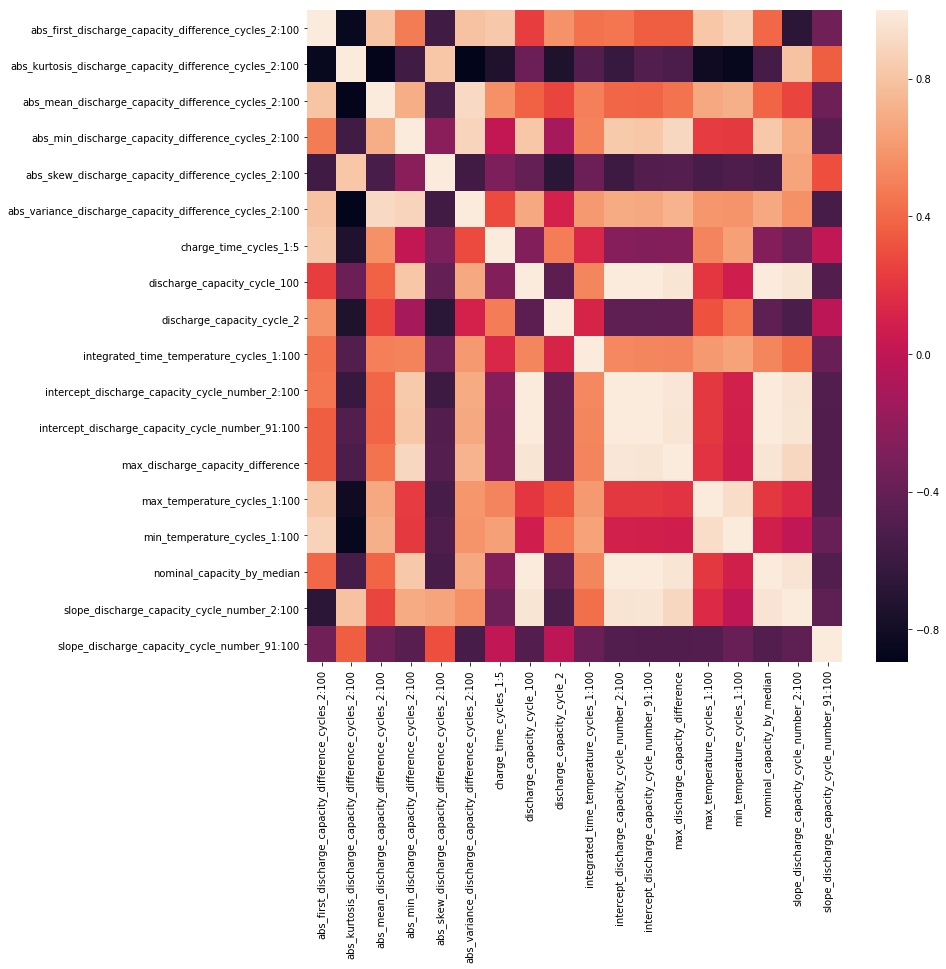

In [50]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)